In [1]:
#!/usr/bin/python3.6
# -*- coding: utf-8 -*-

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import sklearn
import math
import os
import sys
import time

plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签

from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


Bad key "nbagg.transparent" on line 426 in
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_path" on line 509 in
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_args" on line 512 in
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.0/matplotlibrc.template
or from the matplotlib source distribution
In /opt/anaconda3/lib/python3.6/site-

In [2]:
from cigarcabinclassify.classifier import CategoricalClassifier, SparseClassifier, ResnetClassifier

In [3]:
predict_dir = "/opt/tv/aaa/"

In [4]:
basepath = "/opt/tv"

In [5]:
height = 128
width = 128
channels = 3
init_filters = 16
train_dir = basepath + "/training/training"

In [6]:
model1 = load_model("cigar_model_1.h5")
#model1.summary()

In [7]:
model2 = load_model("cigar_model_2.h5")
#model2.summary()

In [8]:
model3 = load_model("cigar_model_3.h5")
#model3.summary()

In [9]:
dir1 = os.listdir(predict_dir)
dict1 = {}
predict_list = []
for file_name in dir1:
    img = image.load_img(predict_dir + file_name, target_size=(128, 128))
    img_arr = np.expand_dims(img, axis=0)
    preds = model1.predict(img_arr/255)
    dict1[file_name] = np.argmax(preds)
    
print(dict1)

{'12.jpg': 19, '13.jpg': 7, '11.jpg': 2, '14.jpg': 10, '15.jpg': 1, '16.jpg': 17, '17.jpg': 19, '18.jpg': 0, '19.jpg': 11, '20.jpg': 13, '21.jpg': 17, '23.jpg': 5, '22.jpg': 13, '24.jpg': 13, '25.jpg': 14, '26.jpg': 8, '27.jpg': 18, '28.jpg': 8, '29.jpg': 18, '30.jpg': 10, '31.jpg': 10, '32.jpg': 18, '34.jpg': 2, '35.jpg': 13, '33.jpg': 18, '36.jpg': 3, '37.jpg': 1, '38.jpg': 14, '39.jpg': 7, '40.jpg': 5, '41.jpg': 18, '42.jpg': 7, '43.jpg': 14, '44.jpg': 10, '45.jpg': 18, '46.jpg': 13, '47.jpg': 5, '48.jpg': 5, '49.jpg': 12, '50.jpg': 18, '51.jpg': 3, '52.jpg': 7, '53.jpg': 17, '54.jpg': 13, '55.jpg': 5, '56.jpg': 5, '57.jpg': 14, '0.jpg': 14, '1.jpg': 9, '3.jpg': 17, '2.jpg': 18, '5.jpg': 14, '4.jpg': 13, '6.jpg': 13, '7.jpg': 17, '9.jpg': 7, '8.jpg': 18, '10.jpg': 18}


In [10]:
dir2 = os.listdir(predict_dir)
dict2 = {}
predict_list = []
for file_name in dir2:
    img = image.load_img(predict_dir + file_name, target_size=(128, 128))
    img_arr = np.expand_dims(img, axis=0)
    preds = model2.predict(img_arr/255)
    dict2[file_name] = np.argmax(preds)

In [11]:
dir3 = os.listdir(predict_dir)
dict3 = {}
predict_list = []
for file_name in dir3:
    img = image.load_img(predict_dir + file_name, target_size=(128, 128))
    img_arr = np.expand_dims(img, axis=0)
    preds = model3.predict(img_arr/255)
    dict3[file_name] = np.argmax(preds)

In [12]:
def getCigarDateframe():
    file_name = './csv/cigar_map.csv'
    df = pd.read_csv(file_name, dtype={'code': str, 'name': str})
    return df

In [13]:
dir = os.listdir(predict_dir)
dict_result = {}
for file_name in dir:
    dict_result[file_name] = np.argmax(np.bincount([dict1[file_name],dict2[file_name],dict3[file_name]]))
print(dict_result)

{'12.jpg': 12, '13.jpg': 7, '11.jpg': 2, '14.jpg': 10, '15.jpg': 8, '16.jpg': 17, '17.jpg': 12, '18.jpg': 0, '19.jpg': 11, '20.jpg': 13, '21.jpg': 2, '23.jpg': 2, '22.jpg': 1, '24.jpg': 13, '25.jpg': 2, '26.jpg': 8, '27.jpg': 18, '28.jpg': 8, '29.jpg': 18, '30.jpg': 10, '31.jpg': 10, '32.jpg': 9, '34.jpg': 2, '35.jpg': 2, '33.jpg': 18, '36.jpg': 3, '37.jpg': 1, '38.jpg': 14, '39.jpg': 7, '40.jpg': 5, '41.jpg': 2, '42.jpg': 7, '43.jpg': 14, '44.jpg': 10, '45.jpg': 18, '46.jpg': 5, '47.jpg': 5, '48.jpg': 5, '49.jpg': 3, '50.jpg': 3, '51.jpg': 3, '52.jpg': 16, '53.jpg': 17, '54.jpg': 13, '55.jpg': 5, '56.jpg': 5, '57.jpg': 1, '0.jpg': 2, '1.jpg': 9, '3.jpg': 3, '2.jpg': 12, '5.jpg': 1, '4.jpg': 3, '6.jpg': 1, '7.jpg': 6, '9.jpg': 7, '8.jpg': 18, '10.jpg': 14}


In [14]:
df_cigar = getCigarDateframe()
cigar_map = dict(zip(df_cigar.code, df_cigar.name))
cigar_list = df_cigar.code
indices_dict = dict(zip(df_cigar.code, range(len(cigar_list))))

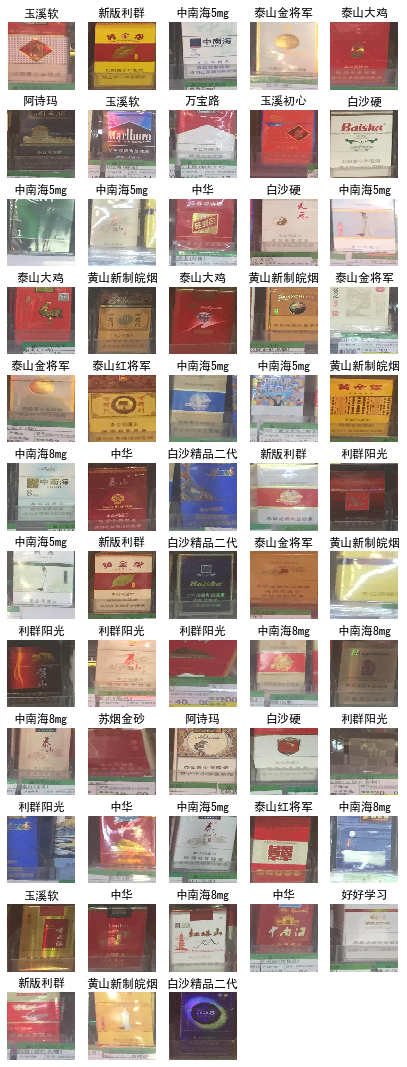

In [15]:
def show_imgs(n_cols, filepath, preds):
    assert n_cols > 0
    assert len(preds) > 0
    max_num = len(preds)
    keys = list(preds.keys())
    n_rows = math.ceil(max_num / n_cols)    #向上取整
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            if index >= max_num:    #如果画完了就退出
                break
            temp_img = image.load_img(filepath + keys[index], target_size = (128, 128))
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(temp_img, cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(cigar_map[cigar_list[preds[keys[index]]]])
    plt.show()
    
show_imgs(5, predict_dir, dict_result)